<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Forming a two-stock portfolio

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [2]:
# Select stock symbol
ticker = 'AAPL'

# Create a dataframe of prices
df = web.DataReader(ticker,'yahoo','01/01/2010','12/31/2018')

# Print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 6 columns):
High         2264 non-null float64
Low          2264 non-null float64
Open         2264 non-null float64
Close        2264 non-null float64
Volume       2264 non-null float64
Adj Close    2264 non-null float64
dtypes: float64(6)
memory usage: 123.8 KB


In [3]:
# Summary statisitcs of data
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000
mean,100.331231,98.528357,99.461275,99.447110,8.011499e+07,92.601709
std,47.162553,46.388636,46.772416,46.777330,5.966773e+07,47.333150
min,28.000000,27.178572,27.481428,27.435715,1.147590e+07,23.871843
25%,62.197856,61.043571,61.647142,61.490002,3.441850e+07,54.453938
50%,95.560715,93.639999,94.639999,94.520000,6.340025e+07,86.229843
75%,126.894999,124.887501,125.972498,125.877502,1.076744e+08,116.441866
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,227.839798


In [4]:
# # Save dataframe into a csv file
# df.to_csv('AAPL.csv')

In [5]:
# Load saved file and read as dataframe indexed by 'Date' column
df = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)

In [6]:
# Print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 6 columns):
High         2264 non-null float64
Low          2264 non-null float64
Open         2264 non-null float64
Close        2264 non-null float64
Volume       2264 non-null float64
Adj Close    2264 non-null float64
dtypes: float64(6)
memory usage: 123.8 KB


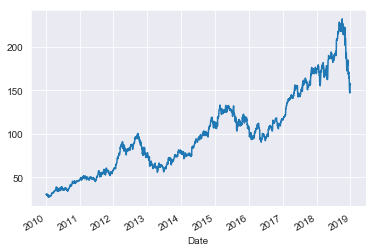

In [7]:
# Stock symbol closing price series
close = df['Close']

# Plot graph of closing price series
close.plot();

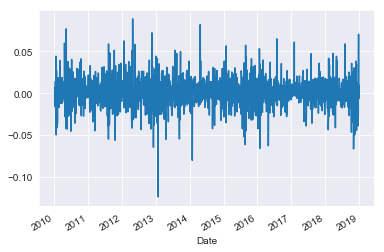

In [8]:
# Daily returns series
returns = close.pct_change().dropna()

# Plot graph of daily returns series
returns.plot();

In [9]:
# Calculate the avaerage returns
mean = np.mean(returns)
# Calculate tandard deviation of daily returns
stdev = np.std(returns)

# Print the mean and standard deviation of daily returns
p(f'Symbol: {ticker}\nMean of daily returns: {mean} \nVolatiltiy of returns: {stdev}')

Symbol: AAPL
Mean of daily returns: 0.0008566085294941909 
Volatiltiy of returns: 0.016194952579986276


In [10]:
# Number of observations
n_periods = 10

# Calculate n-day average returns
mean_10d = mean * n_periods

# Calculate n-day volatility of returns
stdev_10d = stdev * np.sqrt(n_periods)

# Print the n-period mean and standard deviation of daily returns
p(f'Symbol: {ticker}\n{n_periods}-day mean return: {mean_10d} \n{n_periods}-day volatiltiy:  {stdev_10d}')

Symbol: AAPL
10-day mean return: 0.008566085294941909 
10-day volatiltiy:  0.051212936751176864


In [11]:
# Create list of stock symbols
tickers = ['IBM', 'MSFT']

# Create a dataframe of only closing price for each stock 
df = web.DataReader(tickers,'yahoo','01/01/2010','12/31/2018')['Close']

# View dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 2 columns):
IBM     2264 non-null float64
MSFT    2264 non-null float64
dtypes: float64(2)
memory usage: 53.1 KB


In [12]:
# Summary statisitcs of data
df.describe()

Symbols,IBM,MSFT
count,2264.000000,2264.000000
mean,164.785861,48.078754
std,23.939359,23.896496
min,107.570000,23.010000
25%,146.479996,28.860001
50%,162.184998,41.469999
75%,186.037495,57.889999
max,215.800003,115.610001


In [13]:
# # Save dataframe into a csv file
# df.to_csv('IBM_MSFT.csv')

In [14]:
# Load saved file and read as dataframe indexed by 'Date' column
df = pd.read_csv('IBM_MSFT.csv',index_col='Date',parse_dates=True)

In [15]:
# Print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 2 columns):
IBM     2264 non-null float64
MSFT    2264 non-null float64
dtypes: float64(2)
memory usage: 53.1 KB


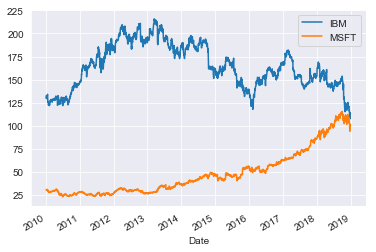

In [16]:
# Plot grapf of the stocks' closing price series
df.plot();

In [17]:
# Calculate daily returns
returns = df.pct_change().dropna()

In [18]:
# Calculate average of daily returns
mean = np.mean(returns)
mean

IBM     0.000009
MSFT    0.000631
dtype: float64

In [19]:
# Calculate standard deviation of daily returns
stdev = np.std(returns)
stdev

IBM     0.012308
MSFT    0.014516
dtype: float64

In [20]:
# Print mean and standard deviation of daily returns
for ticker, ret, vol in zip(tickers, mean, stdev):
    p(f'Symbol: {ticker}\nMean of daily returns: {ret}\nVolatility of returns: {vol}\n')

Symbol: IBM
Mean of daily returns: 8.558952927401782e-06
Volatility of returns: 0.012307560473726796

Symbol: MSFT
Mean of daily returns: 0.0006305539326451306
Volatility of returns: 0.014515509977032272



In [21]:
# Determine the number of periods
n_periods = 10

# Calculate n-period average returns
mean_10d = mean * n_periods

# Calculate n-period volatility of returns
stdev_10d = stdev * np.sqrt(n_periods)

In [22]:
# Print n-period mean and statndard deviation of daily returns
for ticker, ret, vol in zip(tickers, mean_10d, stdev_10d):
    p(f'Symbol: {ticker}\n{n_periods}-day of mean return: {ret} \n{n_periods}-day volatility of returns: {vol}\n')

Symbol: IBM
10-day of mean return: 8.558952927401783e-05 
10-day volatility of returns: 0.038919923537237604

Symbol: MSFT
10-day of mean return: 0.006305539326451306 
10-day volatility of returns: 0.045902072926320384



In [23]:
# Calcualte  the covariance of returns
cov = np.cov(returns['IBM'],returns['MSFT'])[0,1]
cov

8.696353389936726e-05

In [24]:
# Calculate the coefficient of correlation
corr = np.corrcoef(returns['IBM'],returns['MSFT'])[0,1]
corr

0.4865650937024598

In [25]:
# Calculate variance of returns
variance = np.var(returns)
variance

IBM     0.000151
MSFT    0.000211
dtype: float64

In [26]:
# Print variance of returns
for ticker, v in zip(tickers, variance):
    p(f'Symbol: {ticker}\nVairance of daily returns: {v}\n')

Symbol: IBM
Vairance of daily returns: 0.00015147604481444214

Symbol: MSFT
Vairance of daily returns: 0.0002107000298933234



In [27]:
# Calculate 252-day mean of daily returns
mean_252d = mean * 252

mean_252d

IBM     0.002157
MSFT    0.158900
dtype: float64

In [28]:
# Create a vector of weights for a two-asset portfolio
weights = np.asarray([0.5, 0.5])

weights

array([0.5, 0.5])

In [29]:
# Calculate portfolio returns
portfolio_returns = np.sum(mean_252d * weights)

# Portfolio expected annualized return
portfolio_returns

0.08052822358213907

In [30]:
# Calculate the volatiltiy of a 2-asset portfolio
                               # The pow(x, y) function returns x ** y: weights ** 2
portfolio_volatility = np.sqrt(pow(weights[0],2) * variance['IBM'] + \
                               # The product of the asset weight squarred and variance of the same asset
                               pow(weights[1],2) * variance['MSFT'] + \
                               2 * weights[0] * weights[1] * cov) * np.sqrt(252)

In [31]:
# Portfolio annualized volatility
portfolio_volatility

0.18377839366451518

In [32]:
# Calculate the variance-covariance matrix of assets
cov_matrix = returns.cov()

# Print variance-covariance matrix
cov_matrix

,IBM,MSFT
IBM,0.000152,0.000087
MSFT,0.000087,0.000211


In [33]:
# Print the class of the object
type(cov_matrix)

pandas.core.frame.DataFrame

In [34]:
# Create a vector of weights
weights = np.asarray([0.5, 0.5])

# Print the weights
weights

array([0.5, 0.5])

In [35]:
# Calculate portfolio returns with matrix multiplication
portfolio_returns_2 = weights.dot(mean) * 252

# Print portfolio returns
portfolio_returns_2

0.08052822358213908

In [36]:
weights

array([0.5, 0.5])

In [37]:
weights.T

array([0.5, 0.5])

In [38]:
# Calculate portfolio volatility with the covariance matrix
portfolio_volatility_2 = np.sqrt(weights.T.dot(cov_matrix).dot(weights)) * np.sqrt(252)

In [39]:
# Print portfolio volatility
portfolio_volatility_2

0.18380583535340692

In [40]:
# Compare calculation methods of portfolio returns
p('Portfolio Returns:')
# Calculated portfolio returns without dot product
p(f'Portfolio 1: {portfolio_returns}')
# Calculated portfolio returns with the np.dot() dot product method
p(f'Portfolio 2: {portfolio_returns_2}')

Portfolio Returns:
Portfolio 1: 0.08052822358213907
Portfolio 2: 0.08052822358213908


In [41]:
# Compare calculation methods of portfolio volatility
p('Portfolio Volatility:')
# Calculated portfolio returns without dot product
p(f'Portfolio 1: {portfolio_volatility}')
# Calculated portfolio returns with the np.dot() dot product method
p(f'Portfolio 2: {portfolio_volatility_2}')

Portfolio Volatility:
Portfolio 1: 0.18377839366451518
Portfolio 2: 0.18380583535340692


We used two methods to calculte our portfolio metrics: arithmetic and matrix multiplication. And, both methods give us a very similar result. However, when we increase the number of assets in our portfolio, matrix multiplication more efficiently calculates portfolio metrics, and, therefore, is preferable.

In [42]:
# Assumed risk-free rate of return
risk_free = 0.0003

In [43]:
# Calculate the portfolio Sharpe ratio
Sharpe_ratio = (portfolio_returns_2 - risk_free) / portfolio_volatility_2

In [44]:
# Print Sharpe ratio
Sharpe_ratio

0.43648355030667435

In [45]:
# Create a vector of weights
weights_6040= np.asarray([0.6, 0.4])

# Print the portfolio weights
p(f'The portfolio weights are {weights_6040[0]*100}% {tickers[0]} and {weights_6040[1]*100}% {tickers[1]}.')

# Calculate portfolio returns with vector-matrix multiplication
pf_ret_6040 = round(np.dot(weights_6040, mean) * 252,4)

# Calculate portfolio volatility with the covariance matrix dataframe
pf_vol_6040 = round(np.sqrt(np.dot(weights_6040.T,np.dot(cov_matrix, weights_6040))) * np.sqrt(252),4)

# Print the portfolio expected return
p(f'The portfolio expected return is {round(pf_ret_6040*100,4)}%, and volatility is {pf_vol_6040*100}%.')


# Determine hypothetical value of risk-free rate of return
rf = 0.0003

# Calculate Sharpe ratio of portfolio
sharpe_6040 = (pf_ret_6040 - rf) / pf_vol_6040

# Print the portfolio Sharpe ratio
p(f'The portfolio Sharpe ratio is {round(sharpe_6040,4)}.')

The portfolio weights are 60.0% IBM and 40.0% MSFT.
The portfolio expected return is 6.49%, and volatility is 18.099999999999998%.
The portfolio Sharpe ratio is 0.3569.


In [46]:
# Create a vector of portfolio weights
weights_5050 = np.asarray([0.5, 0.5])

# Print the portfolio weights
p(f'The portfolio weights are {weights_5050[0]*100}% {tickers[0]} and {weights_5050[1]*100}% {tickers[1]}.')

# Calculate portfolio returns with vector-matrix multiplication
pf_ret_5050 = round(np.dot(weights_5050, mean) * 252,4)

# Calculate portfolio volatility with the covariance matrix dataframe
pf_vol_5050 = round(np.sqrt(np.dot(weights_5050.T,np.dot(cov_matrix, weights_5050))) * np.sqrt(252),4)

# Print the portfolio expected return
p(f'The portfolio expected return is {round(pf_ret_5050*100,4)}%, and volatility is {pf_vol_5050*100}%.')

# Calculate Sharpe ratio
sharpe_5050 = (pf_ret_5050 - rf) / pf_vol_5050

# Print the portfolio Sharpe ratio
p(f'The portfolio Sharpe ratio is {round(sharpe_5050,4)}.')

The portfolio weights are 50.0% IBM and 50.0% MSFT.
The portfolio expected return is 8.05%, and volatility is 18.38%.
The portfolio Sharpe ratio is 0.4363.


In [47]:
# Create a vector of portfolio weights
weights_7030 = np.asarray([0.7, 0.3])

# Print the portfolio weights
p(f'The portfolio weights are {weights_7030[0]*100}% {tickers[0]} and {weights_7030[1]*100}% {tickers[1]}.')

# Calculate portfolio returns with vector-matrix multiplication
pf_ret_7030 = round(np.dot(weights_7030, mean) * 252,4)

# Calculate portfolio volatility with the covariance matrix dataframe
pf_vol_7030 = round(np.sqrt(np.dot(weights_7030.T,np.dot(cov_matrix, weights_7030))) * np.sqrt(252),4)

# Print the portfolio expected return
p(f'The portfolio expected return is {round(pf_ret_7030*100,4)}%, and volatility is {pf_vol_7030*100}%.')

# Calculate Sharpe ratio
sharpe_7030 = (pf_ret_7030 - rf) / pf_vol_7030

# Print the portfolio Sharpe return
p(f'The portfolio Sharpe ratio is {round(sharpe_7030,4)}.')

The portfolio weights are 70.0% IBM and 30.0% MSFT.
The portfolio expected return is 4.92%, and volatility is 18.08%.
The portfolio Sharpe ratio is 0.2705.


In [48]:
# Create a vector of portfolio weights
weights_3070 = np.asarray([0.3, 0.7])

# Print the portfolio weights
p(f'The portfolio weights are {weights_3070[0]*100}% {tickers[0]} and {weights_3070[1]*100}% {tickers[1]}.')

# Calculate portfolio returns with vector-matrix multiplication
pf_ret_3070 = round(np.dot(weights_3070, mean) * 252,4)

# Calculate portfolio volatility with the covariance matrix dataframe
pf_vol_3070 = round(np.sqrt(np.dot(weights_3070.T,np.dot(cov_matrix, weights_3070))) * np.sqrt(252),4)

# Print the portfolio return and volatiltiy
p(f'The portfolio expected return is {round(pf_ret_3070*100,4)}%, and volatility is {pf_vol_3070*100}%.')

# Calculate Sharpe ratio
sharpe_3070 = (pf_ret_3070 - rf) / pf_vol_3070

# Print the portfolio Sharpe ratio
p(f'The portfolio Sharpe ratio is {round(sharpe_3070,4)}.')

The portfolio weights are 30.0% IBM and 70.0% MSFT.
The portfolio expected return is 11.19%, and volatility is 19.66%.
The portfolio Sharpe ratio is 0.5677.


In [49]:
# Create a vector of portfolio weights 
weights_4060 = np.asarray([0.4, 0.6])

# Print the portfolio weights
p(f'The portfolio weights are {weights_4060[0]*100}% {tickers[0]} and {weights_4060[1]*100}% {tickers[1]}.')

# Calculate portfolio returns with vector-matrix multiplication
pf_ret_4060 = round(np.dot(weights_4060, mean) * 252,4)

# Calculate portfolio volatility with the covariance matrix dataframe
pf_vol_4060 = round(np.sqrt(np.dot(weights_4060.T,np.dot(cov_matrix, weights_4060))) * np.sqrt(252),4)

# Print the portfolio return and volatility
p(f'The portfolio expected return is {round(pf_ret_4060*100,4)}%, and volatility is {pf_vol_4060*100}%.')

# Calculate the portfolio Sharpe ratio
sharpe_4060 = (pf_ret_4060 - rf) / pf_vol_4060

# Print the portfolio Sharpe ratio
p(f'The portfolio Sharpe ratio is {round(sharpe_4060,4)}.')

The portfolio weights are 40.0% IBM and 60.0% MSFT.
The portfolio expected return is 9.62%, and volatility is 18.91%.
The portfolio Sharpe ratio is 0.5071.


In [50]:
# Create a dictionary of asset weights for each portfolio
pf_3070 = {'IBM':weights_3070[0],'MSFT':weights_3070[1]}
pf_4060 = {'IBM':weights_4060[0],'MSFT':weights_4060[1]}
pf_5050 = {'IBM':weights_5050[0],'MSFT':weights_5050[1]}
pf_6040 = {'IBM':weights_6040[0],'MSFT':weights_6040[1]}
pf_7030 = {'IBM':weights_7030[0],'MSFT':weights_7030[1]}

In [51]:
# Create a dictionary containing data of all portfolios
portfolio_data = {'Portfolio':['30/70','40/60','50/50','60/40','70/30'],
                  'Returns':[pf_ret_3070,pf_ret_4060,pf_ret_5050,pf_ret_6040,pf_ret_7030],
                  'Volatility':[pf_vol_3070,pf_vol_4060,pf_vol_5050,pf_vol_6040,pf_vol_7030],
                  'Sharpe Ratio':[sharpe_3070,sharpe_4060,sharpe_5050,sharpe_6040,sharpe_7030]}

# Convert the dictionary into DataFrame 
df = pd.DataFrame(portfolio_data)

# Print the dataframe
df

,Portfolio,Returns,Sharpe Ratio,Volatility
0,30/70,0.1119,0.567650,0.1966
1,40/60,0.0962,0.507139,0.1891
2,50/50,0.0805,0.436344,0.1838
3,60/40,0.0649,0.356906,0.1810
4,70/30,0.0492,0.270465,0.1808


In [52]:
# Locate the maximum Sharpe ratio portfolio
max_sharpe_pf = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

# Print the maximum Sharpe ratio portfolio
max_sharpe_pf

,Portfolio,Returns,Sharpe Ratio,Volatility
0,30/70,0.1119,0.56765,0.1966


In [53]:
# Locate the maximum returns portfolio
max_ret_pf = df[df['Returns'] == df['Returns'].max()]

# Print the the maximum returns portfolio
max_ret_pf

,Portfolio,Returns,Sharpe Ratio,Volatility
0,30/70,0.1119,0.56765,0.1966


In [54]:
# Locate the minimum volatility portfolio
min_vol_pf = df[df['Volatility'] == df['Volatility'].min()]

# Print the minimum volatility portfolio
min_vol_pf

,Portfolio,Returns,Sharpe Ratio,Volatility
4,70/30,0.0492,0.270465,0.1808


We created a two stock portfolio. We made several versions of a two stock portfolio, which had different weights for each asset. We meausred the returns, volatility, and Sharpe ratio of each differently weighted portfolio. We found the maximum Sharpe ratio portfolio, maximum returns portfolio, and minimum volatility portfolio by manually adjusting the weights of the assets. Next, we will create a multiple stock portfolio,